In [21]:
import sys
sys.path.append('../..')
sys.path.append('../data')
sys.path.append('../../helper_code')

from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from helper_code.custom_kernel import *
from helper_code.util import *

In [22]:
input_dataset = ['c', 'c_lexi', 'c_lexi_nd', 'CE', 'CE_lexi', 'CE_lexi_nd', 'CSE', 'CSE_lexi', 'CSE_lexi_nd']
dataset_dict = {}

for data in input_dataset:
    dataset_dict[data] = pd.read_csv(f'../data/coronene_training_data/{data}.csv')

delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_total_energy.csv')
delta_delta_total_energy = pd.read_csv(f'../data/coronene_training_data/delta_delta_total_energy.csv')

In [23]:
model_collection = {}
performance_summary = {}

## Baseline ##

In [24]:
X = dataset_dict['c'].to_numpy()
y = delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_Gaussian'] = model
performance_summary['ANM_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,11896.886947,220.289309
2,128,10453.775184,47.046992
3,256,9990.408613,25.467193
4,512,9661.619321,34.918677
5,1024,9261.51304,31.954861
6,2048,8631.704874,96.733252


In [25]:
X = dataset_dict['c'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_Gaussian_delta'] = model
performance_summary['ANM_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,2554.635879,47.323096
2,128,2253.148521,17.504681
3,256,2127.611428,7.601337
4,512,2042.726102,6.687933
5,1024,1954.462759,7.132839
6,2048,1825.68862,20.075954


## CE with Gaussian ##

In [26]:
X = dataset_dict['CE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 4.6e-11, 'gamma': 2.8e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CE_lexi_Gaussian'] = model
performance_summary['ANM_CE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,1073.49046,29.836916
2,128,936.026102,10.849302
3,256,872.206158,3.504171
4,512,828.597725,2.655899
5,1024,794.91737,3.391348
6,2048,750.129299,9.020378


## CSE with Gaussian ##

In [30]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.6596764933651303e-07, 'gamma': 2.1567299387422978e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian'] = model
performance_summary['ANM_CSE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,150.270564,6.061951
2,128,126.91093,1.664327
3,256,117.246923,0.856652
4,512,112.195016,0.701018
5,1024,109.951564,0.538783
6,2048,108.659269,1.88854


In [31]:
X = dataset_dict['CSE_lexi_nd'].to_numpy()
y = delta_delta_total_energy.to_numpy()

best_params = {'alpha': 1.5563301230102018e-07, 'gamma': 2.545548038867767e-06, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 12)]
num_trials = 10

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_nd_Gaussian'] = model
performance_summary['ANM_CSE_lexi_nd_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,150.047107,5.801198
2,128,126.670716,1.693531
3,256,116.914692,0.866924
4,512,111.833147,0.738792
5,1024,109.822869,0.559417
6,2048,108.691119,1.893283


## Learning Curve ##

In [16]:
print(performance_summary.keys())

dict_keys(['ANM_Gaussian', 'ANM_Gaussian_delta', 'ANM_CE_lexi_Gaussian_delta', 'ANM_CSE_lexi_Gaussian_delta'])


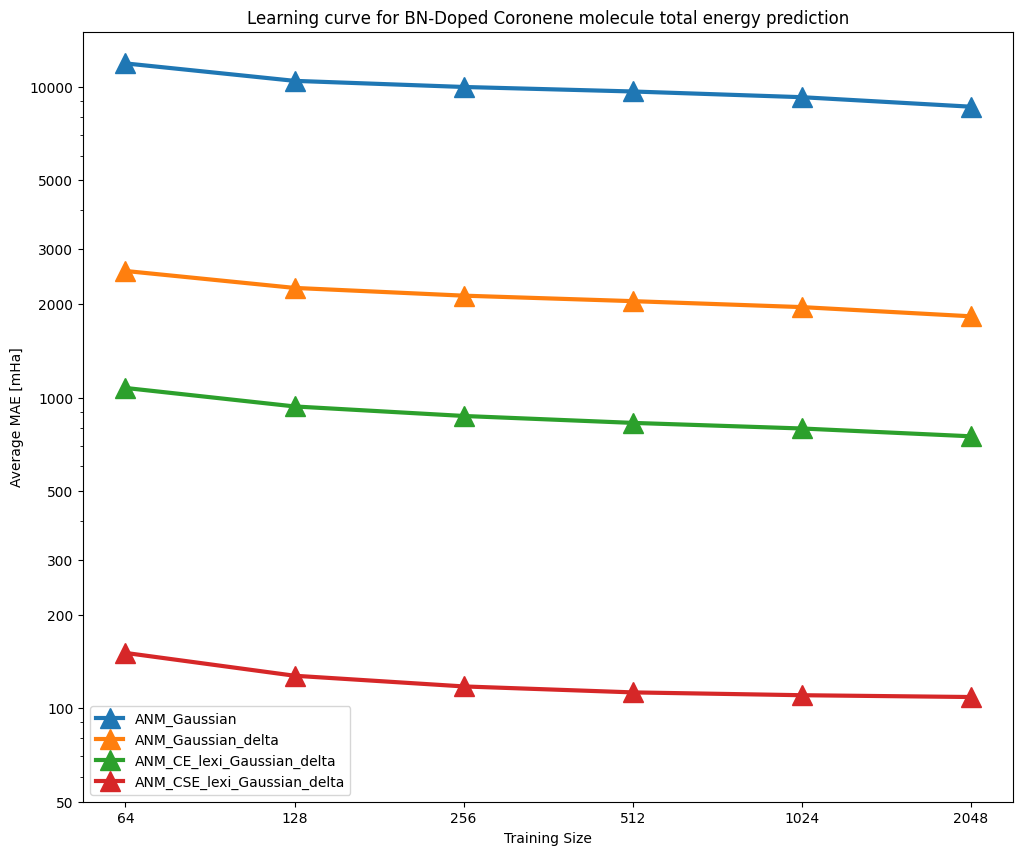

In [18]:
plt.figure(figsize=(12, 10))

x = performance_summary['ANM_Gaussian']['training size']
y_values = {}
for key, df in performance_summary.items():
    y_values[key] = df['average MAE (mHa)']

linewidth = 3
markersize = 15

for key, y_value in y_values.items():
    plt.plot(x, y_value, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [50, 100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.savefig('../graph/[Coronene] [1.0] Learning curve for BN-Doped Coronene molecule total energy prediction.png', dpi=300)
plt.show()

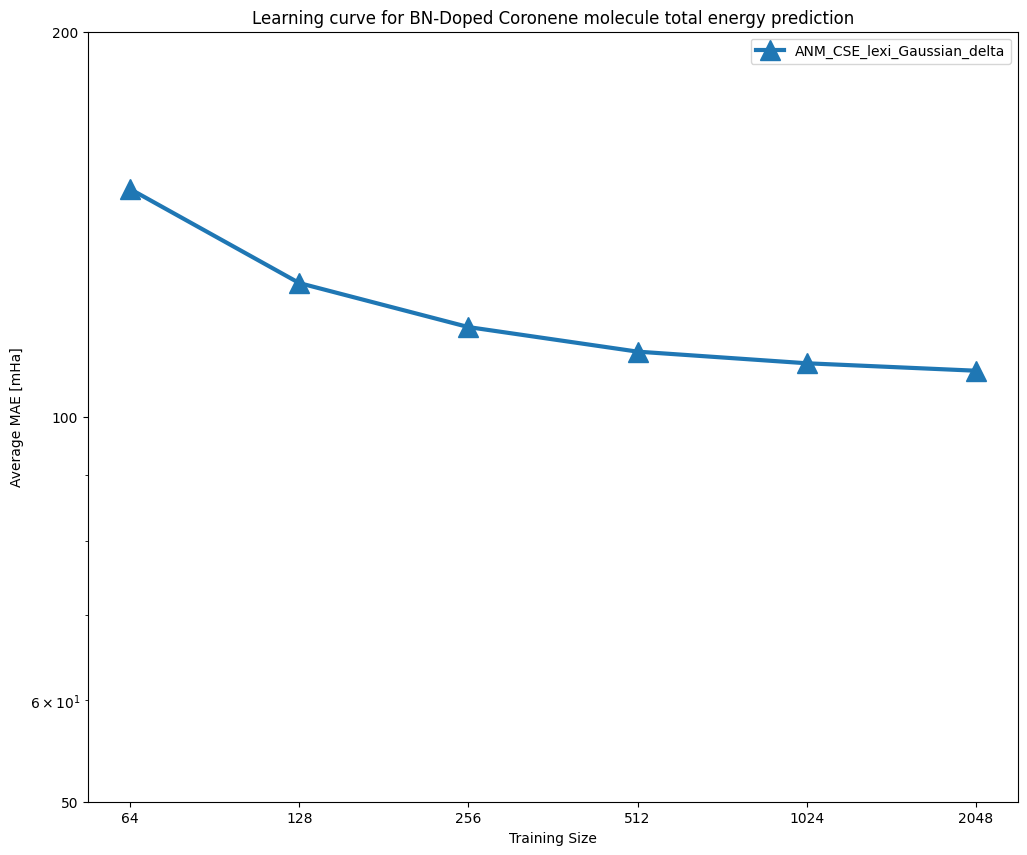

In [19]:
plt.figure(figsize=(12, 10))
x = performance_summary['ANM_Gaussian']['training size']
y = performance_summary['ANM_CSE_lexi_Gaussian_delta']['average MAE (mHa)']
plt.plot(x, y, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)

plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 12)]
yticks = [50, 100, 200]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.show()